In [1]:
#setup
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import gensim

sns.set_theme()
plt.rcParams["figure.figsize"] = (10,8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from main import nlp_pipeline_result

In [3]:
# data_non_ner = nlp_pipeline_result(
#     parser_parameters={
#         "remove_hashtag_word": True,
#         "replace_politics": True,
#         "replace_parties": True,
#     },
#     nlp_parameters={
#         "disable_parser": False,
#         "disable_ner": False
#     }
# )
# data_non_ner['n_lemmas'] = data_non_ner['Lemmas'].str.split().str.len()

# data_non_ner.to_csv('data/data.csv', index = False)

In [4]:
data = pd.read_csv('data/data.csv')


In [5]:


train = data.sample(frac = 0.8, random_state = 420)
test = data.drop(train.index)

print("Len data: ", len(data))
print("Len train: ", len(train))
print("Len test: ", len(test))


data = train

Len data:  14933
Len train:  11946
Len test:  2987


In [6]:
for i in range(0,50,10):
    display(data[i:i+10])

,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
545,@antonio_elvira_ Buen resumen,antonio_elvira_ Buen resumen,1,1,Francisco José Alcaraz Martos,Vox,resumir,1
13636,Detenidos dos escoltas de Pablo Iglesias por a...,Detenidos dos escoltas de Pablo Iglesias por a...,169,72,Juan Luis Steegmann Olmedillas,Vox,detenido escolta Pablo Iglesias agredir policí...,11
2550,Pero los nazis segun @ionebelarra son los de @...,Pero los nazis segun ionebelarra son los de vo...,36,33,Inés María Cañizares Pacheco,Vox,nazi ionebelarro ayuntamiento Unidas evidencia...,9
1085,429 días lleva Joaquín Beltrán enterrado bajo ...,429 días lleva Joaquín Beltrán enterrado bajo ...,4050,1165,Beatriz Álvarez Fanjul,PP,Joaquín Beltrán enterrado basura Vertedero Zal...,7
6165,Iglesias hablando de Cultura y de rescatar al ...,Iglesias hablando de Cultura y de rescatar al ...,7,6,Alicia García Rodríguez,PP,Iglesias hablar Cultura rescatar sector ayuda ...,15
4041,@Clarita41422010 @MAngelCastaneda Lea la norma...,Clarita41422010 MAngelCastaneda Lea la normati...,3,1,Emilio Jesús Del Valle Rodríguez,Vox,MAngelCastaneda Lea normativa Cantabria favor,5
7092,ℹ️ El día 11 de marzo recibí un sobre con un r...,ℹ El día 11 de marzo recibí un sobre con un re...,3859,2009,Jon Iñarritu García,EH Bildu,marzo recibir regalo remitente Escorial famili...,18
7420,#VotosFrenteABalas esto se trata de #FascismoO...,VotosFrenteABalas esto se trata de FascismoODe...,7,6,Antonia Jover Díaz,Unidas Podemos,votosfrenteaba él FascismoODemocracia ellosvan...,6
14630,Casado no es Rajoy. Casado no es Ayuso. Casado...,Casado no es Rajoy Casado no es Ayuso Casado n...,98,48,Daniel Vicente Viondi,PSOE,Casado Rajoy Casado Ayuso Casado Feijoo Casado...,20
4686,¿Por qué no se liberan las #patentes para que ...,Por qué no se liberan las patentes para que pu...,25,28,Odón Elorza González,PSE-EE-PSOE,liberar patente producir él vacuna anti COVID ...,14


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
11516,Creo que un primo segundo del tatarabuelo del ...,Creo que un primo segundo del tatarabuelo del ...,16,1,Joaquín Robles López,Vox,primo tatarabuelo cuñado tía re sobrino relaci...,11
5875,Cuando los sindicatos de Correos (UGT y CCOO) ...,Cuando los sindicatos de Correos UGT y CCOO no...,101,52,Mario Garcés Sanagustín,PP,sindicato Correos UGT CCOO entender ocurrir,6
10976,Esto. #YoconAyuso #votaLibertad,Esto YoconAyuso votaLibertad,24,5,Margarita Prohens Rigo,PP,YoconAyuso votalibertad,2
5983,Confirmado: esta es la nueva lona de Gabilondo.,Confirmado esta es la nueva lona de Gabilondo,636,282,Teodoro García Egea,PP,confirmadir lona Gabilondo,3
3426,2) ... Vds. un VERDADERO problema psicológico ...,2 Vds un VERDADERO problema psicológico y demo...,110,35,Francisco José Contreras Peláez,Vox,Vds problema psicológico demográfico llegar ap...,13
5469,Feliz y reivindicativo día de las y los trabaj...,Feliz y reivindicativo día de las y los trabaj...,117,30,Sofía Fernández Castañón,Unidas Podemos,Feliz reivindicativo trabajador,3
4491,@maite_frutos @eldiarioes Mi posición es muy c...,maite_frutos eldiarioes Mi posición es muy clara,0,0,Odón Elorza González,PSE-EE-PSOE,eldiario posición claro,3
6074,"Nunca la política, el entendimiento, el diálog...",Nunca la política el entendimiento el diálogo ...,1,1,Roberto García Morís,PSOE,política entendimiento diálogo sentido mes Adr...,7
12283,Hoy #UnidasPodemos en Congreso registramos pre...,Hoy UnidasPodemos en Congreso registramos preg...,35,27,Marisa Saavedra Muñoz,Unidas Podemos,unidaspodemos Congreso registrar pregunta Gobi...,21
3397,"""Soy la única candidata madre de familia númer...",Soy la única candidata madre de familia número...,2693,980,Ricardo Chamorro Delmo,Vox,único candidata madre familia númerós autónomo...,19


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
3752,@____joseluis Muchas gracias.,____joseluis Muchas gracias,2,1,Francisco José Contreras Peláez,Vox,joseluis gracia,2
4907,Hoy en el acto de jóvenes: esta es nuestra for...,Hoy en el acto de jóvenes esta es nuestra form...,1587,349,Íñigo Errejón Galván,Más País-Equo,acto joven forma mundo,4
7635,@davidferdur Libertad para destruir el medio a...,davidferdur Libertad para destruir el medio am...,1,0,Juan Antonio López de Uralde Garmendia,Unidas Podemos,davidferdur Libertad destruir ambiente recurso...,6
507,@ManuHdez14 @Macarena_Olona @monasterioR @vox_...,ManuHdez14 Macarena_Olona monasterioR vox_es Q...,13,4,Francisco José Alcaraz Martos,Vox,monasterioR equipo orgulloso agradecido,4
10540,Algunos de ellos necesitarán un croquis. Cotiz...,Algunos de ellos necesitarán un croquis Cotiza...,5,0,Víctor Valentín Píriz Maya,PP,necesitar croquis Cotizar cotizar empresa privado,6
9018,¿Sabes por qué le escandalizan tanto estos car...,Sabes por qué le escandalizan tanto estos cart...,30,12,Manuel Mestre Barea,Vox,escandalizar cartel Pablo reflejo miseria podr...,16
12181,Esto es lo que pasa cuando el PP preside una C...,Esto es lo que pasa cuando el PP preside una C...,3026,1074,Gabriel Rufián Romero,ERC-S,pasar PP presidir Comisión Investigación,5
10502,Nivelazo! Mañana en el aire con el gran @eugen...,Nivelazo Mañana en el aire con el gran eugenio...,5,1,Víctor Valentín Píriz Maya,PP,Nivelazo aire eugenionarbaiza,3
4398,Esto es intolerable @interiorgob,Esto es intolerable interiorgob,546,482,María Gloria Elizo Serrano,Unidas Podemos,intolerable interiorgob,2
13408,@PPalaveses @InakiOyarzabal Enhorabuena Iñaki....,PPalaveses InakiOyarzabal Enhorabuena Iñaki Un...,5,1,Sergio Sayas López,Navarra Suma,PPalaveses InakiOyarzabal Enhorabuena Iñaki fu...,6


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
7906,¿Cuándo llegará el AVE a esa Estación de Badaj...,Cuándo llegará el AVE a esa Estación de Badajo...,7,5,Andrés Lorite Lorite,PP,llegar AVE Estación Badajoz Ábalos año mentir ...,8
9360,1️⃣ Condenar toda violencia o amenaza venga de...,1 Condenar toda violencia o amenaza venga de d...,117,40,María Muñoz Vidal,Ciudadanos,Condenar violencia amenaza venir venir renunci...,20
1904,Los deportistas internacionales tienen que lle...,Los deportistas internacionales tienen que lle...,84,42,Ana María Beltrán Villalba,PP,deportista internacional llevar él mano cabeza...,14
6634,¿Está comparando @carmencalvo_ a @IdiazAyuso c...,Está comparando carmencalvo_ a IdiazAyuso con ...,357,152,Antonio González Terol,PP,comparar carmencalvo IdiazAyuso Hitler perder ...,6
13137,🤫El Gobierno de España invierte más millones d...,El Gobierno de España invierte más millones de...,2,4,Marisol Sánchez Jódar,PSOE,Gobierno España invertir millón euros RegionDe...,10
12763,@Rapsies Pues que se localice y aplique la Ley...,Rapsies Pues que se localice y aplique la Ley ...,6,0,Víctor Manuel Sánchez del Real,Vox,Rapsies localizar aplicar Ley fácil,5
10873,"¡Felicidades, Madrid!#2deMayo",Felicidades Madrid 2deMayo,2,2,Ana Prieto Nieto,PSdeG-PSOE,felicidad Madrid,2
3141,"Hay muchos compromisos que avanzan, especialme...",Hay muchos compromisos que avanzan especialmen...,22,20,Pedro Casares Hontañón,PSOE,compromiso avanzar mitmagob abalosmeco Reforma...,19
10736,Sánchez no dice la verdad ni al médico,Sánchez no dice la verdad ni al médico,15,11,Víctor Valentín Píriz Maya,PP,Sánchez médico,2
12492,@MonsieurSansFoy Y según Sánchez (el otro) con...,MonsieurSansFoy Y según Sánchez el otro con es...,10,2,Víctor Manuel Sánchez del Real,Vox,MonsieurSansFoy Sánchez velocidad ibérico conv...,7


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
5068,@sayonara_beibi @catolica_a @ivanedlm Es que s...,sayonara_beibi catolica_a ivanedlm Es que son ...,3,0,Íñigo Errejón Galván,Más País-Equo,ivanedlm reconocer error,3
12439,"Dan la libertad condicional, con fianza, a los...",Dan la libertad condicional con fianza a los e...,72,13,Víctor Manuel Sánchez del Real,Vox,libertad condicional fianza extremeño,4
14270,Una mujer valiente!! @IdiazAyuso Emocionante @...,Una mujer valiente IdiazAyuso Emocionante Nach...,1918,410,Ana Belén Vázquez Blanco,PP,mujer valiente IdiazAyuso Emocionante nachocan...,7
1706,Os invito a descubrir algunas de las obras que...,Os invito a descubrir algunas de las obras que...,11,6,Meritxell Batet Lamaña,PSC,invitar descubrir obra formar patrimonio artís...,13
7506,@ppmadrid Gabilondo e Iglesias no mienten más ...,ppmadrid Gabilondo e Iglesias no mienten más p...,1,1,Sebastián Jesús Ledesma Martín,PP,ppmadrid Gabilondo Iglesias mentir mentira pat...,7
227,¡El futuro pertenece a los Patriotas! 1º de M...,El futuro pertenece a los Patriotas 1º de Mayo...,86,37,Juan José Aizcorbe Torra,Vox,futuro pertenecer Patriotas mayo vía YouTube,6
2595,¿Tienes un coche diésel? ¿Bebes Coca-Cola? ¿Us...,Tienes un coche diésel Bebes Coca Cola Usas au...,85,40,Eduardo Carazo Hermoso,PP,tener coche diésel Bebes Coca Cola autovía ric...,9
4572,⏳En el debate sobre #PatentesFarmaceuticas y #...,En el debate sobre PatentesFarmaceuticas y Vac...,34,25,Odón Elorza González,PSE-EE-PSOE,debate PatentesFarmaceuticas VacunacionGlobal ...,17
4610,📣” Las #vacunas : ¿un bien de negocio de las f...,Las vacunas un bien de negocio de las farmacéu...,57,44,Odón Elorza González,PSE-EE-PSOE,vacuna negocio farmacéutico público universal ...,9
7043,@RPManu17 También estáis avergonzando al fútbo...,RPManu17 También estáis avergonzando al fútbol...,0,0,Pablo Iglesias Turrión,Unidas Podemos,avergonzar fútbol mundial ver,4


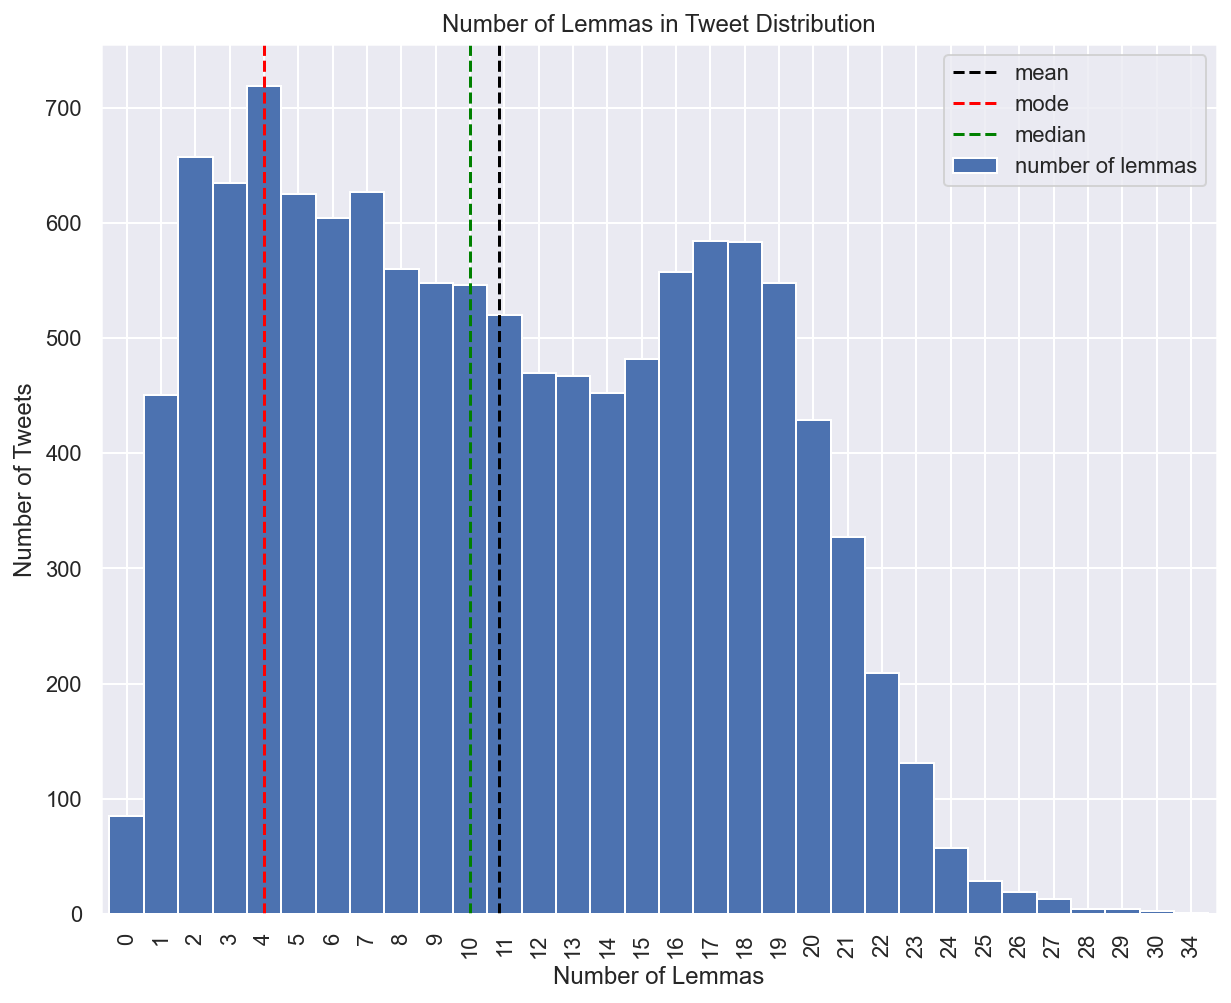

In [7]:
plt.figure()
data['n_lemmas'].value_counts().sort_index().plot(kind="bar",width=1,label='number of lemmas')
plt.axvline(x = data['n_lemmas'].mean(),label='mean',color = 'black',linestyle = '--')
plt.axvline(x = data['n_lemmas'].mode()[0],label='mode',color = 'red',linestyle = '--')
plt.axvline(x = data['n_lemmas'].median(),label='median',color = 'green',linestyle = '--')
plt.legend()
plt.title('Number of Lemmas in Tweet Distribution')
plt.xlabel('Number of Lemmas')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
data = data[data['n_lemmas']>=3]
print('Number of Tweets in Dataframe after removing short tweets:', len(data))

Number of Tweets in Dataframe after removing short tweets: 10753


In [9]:
tweets_corpus = data["Lemmas"].tolist()
# tweets_corpus = list(set(tweets_corpus))
tweets_corpus = [el.split() for el in tweets_corpus]

# display(tweets_corpus)

In [10]:
from gensim.corpora import Dictionary

token_dic = Dictionary(tweets_corpus)


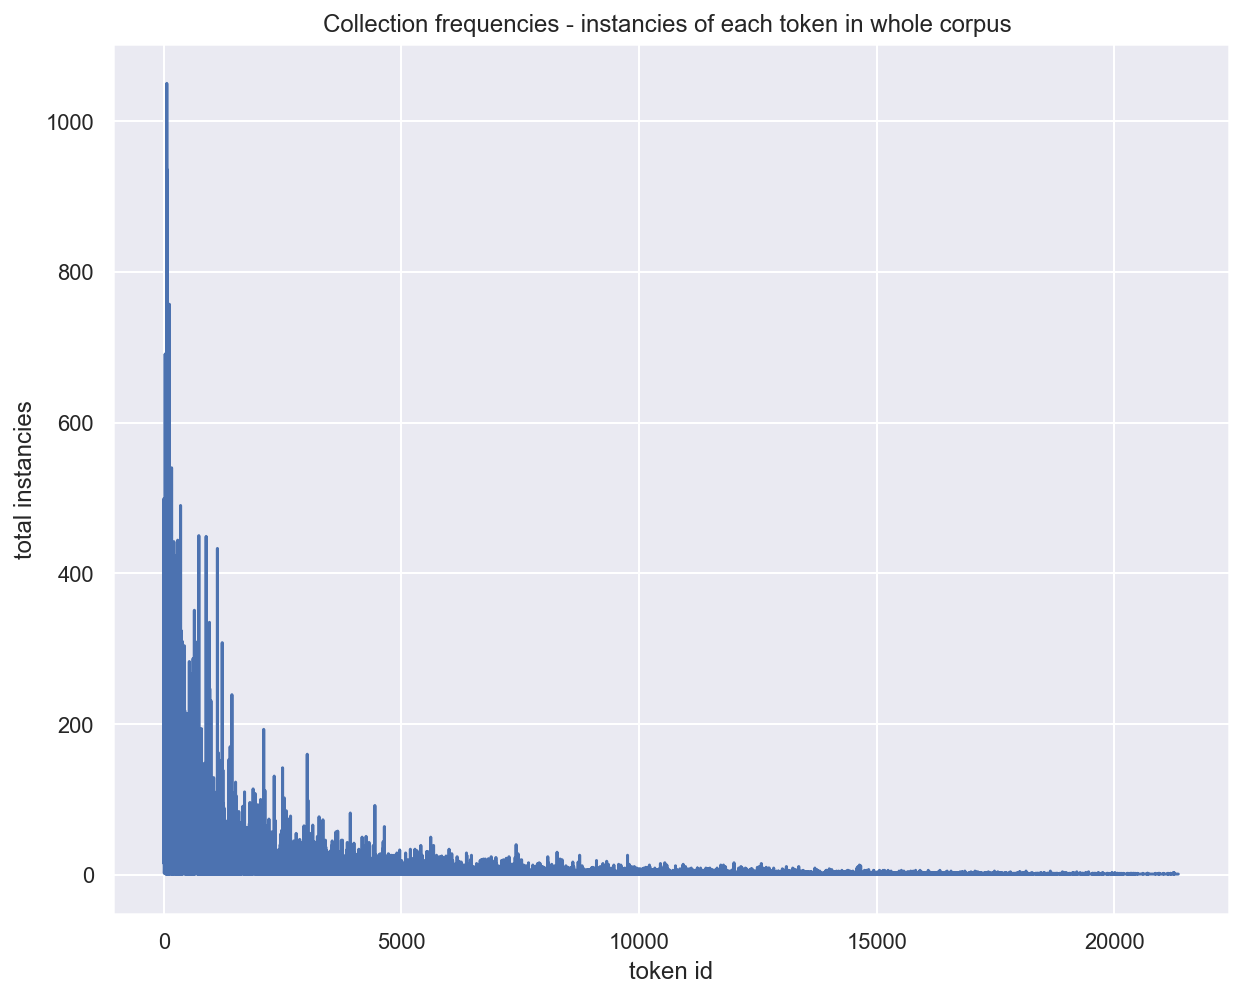

Max of occurances per topic:  1050
Mean of occurances per topic:  5.990256242094908


In [11]:
# Collection frequencies: token_id -> how many instances of this token are contained in the documents.

collfreq = token_dic.cfs.items()
collfreq = sorted(collfreq) 
x, y = zip(*collfreq) 
plt.plot(x, y)
plt.title('Collection frequencies - instancies of each token in whole corpus ')
plt.xlabel('token id')
plt.ylabel('total instancies')
plt.show()



# MEAN

count = 0
_sum = 0
for key in token_dic.cfs:
    count += 1
    _sum += token_dic.cfs[key]

instances_mean = _sum/count



#MAX

instances_max = max(token_dic.cfs.values())





print("Max of occurances per topic: ",instances_max )
print("Mean of occurances per topic: ",instances_mean )






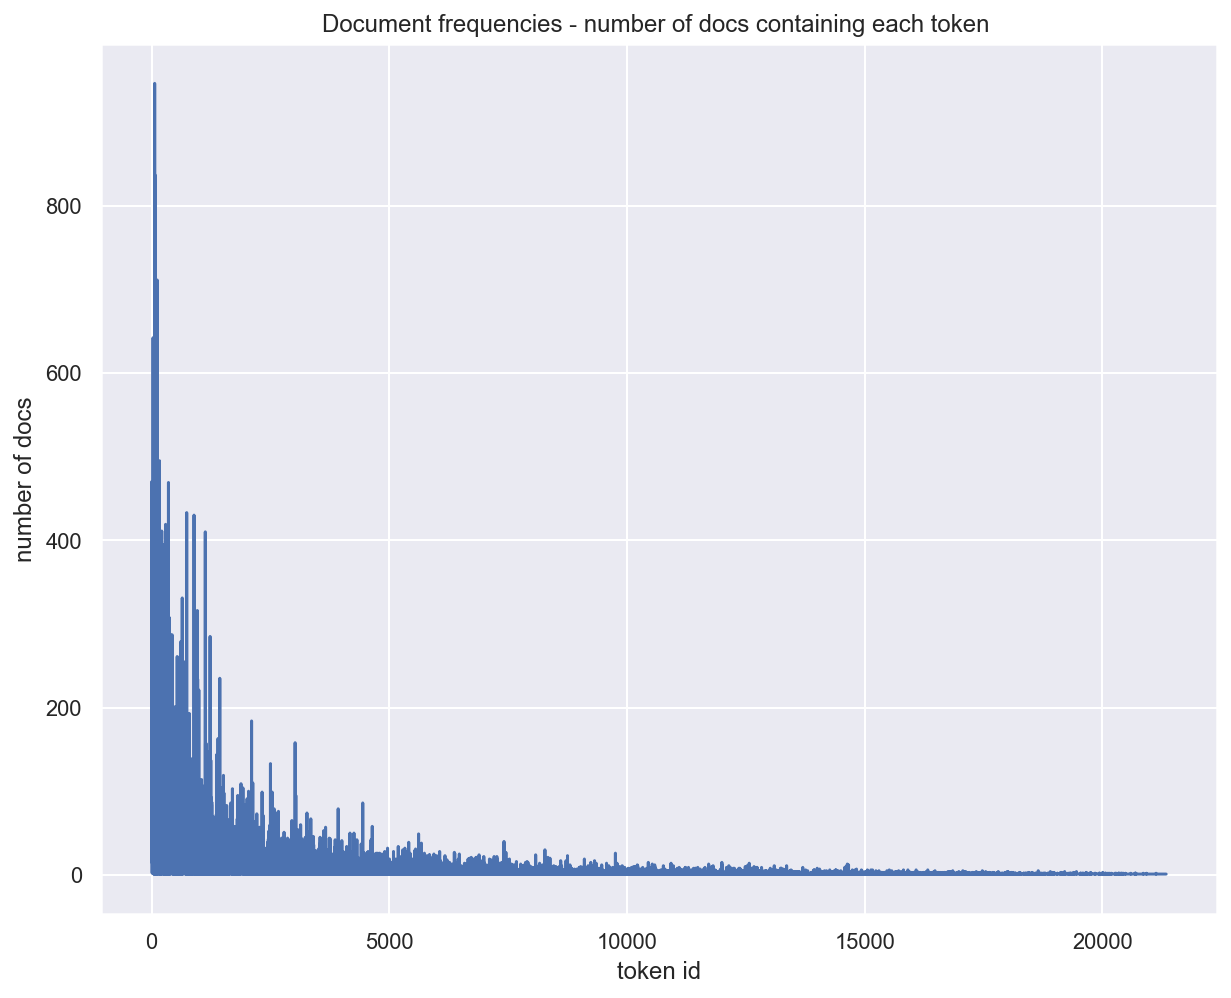

Max of docs in which a token appears:  946
Mean of docs in which token appears:  5.791774019768586


In [12]:
# Document frequencies: token_id -> how many documents contain this token


docfreq = token_dic.dfs.items()
docfreq = sorted(docfreq) 
j, k = zip(*docfreq) 
plt.plot(j, k)
plt.title('Document frequencies - number of docs containing each token ')
plt.xlabel('token id')
plt.ylabel('number of docs')
plt.show()



# MEAN

count = 0
_sum = 0
for key in token_dic.dfs:
    count += 1
    _sum += token_dic.dfs[key]

docs_mean = _sum/count



#MAX

docs_max = max(token_dic.dfs.values())





print("Max of docs in which a token appears: ",docs_max )
print("Mean of docs in which token appears: ",docs_mean )



In [13]:
#FILTER TOKEN DICTIONARY




no_below_list = [1,2,3,4,5,6,7,8,9,10] #Minimum number of documents to keep a term in the dictionary
no_above_list = [.5, .4, .3, .2, .05, .04, .03, .02, .005, .004, .003, .002, .0005, .0004, 0.0003, .0002] #Maximum proportion of documents in which a term can appear to be kept in the dictionary

prev_dic = copy.copy(token_dic)
prev_tokens = len(token_dic)


# print('The dictionary contained', prev_tokens, 'terms')

# for i in no_below_list:
    
#     for j in no_above_list:
        
#         token_dic = Dictionary(tweets_corpus)
        
#         token_dic.filter_extremes(no_below=i,no_above=j)
        
#         n_tokens = len(token_dic)
        
#         print(n_tokens, 'terms |no_below = ', i, "| no_above = ", j)



#print('First terms in the dictionary:')
#for n in range(500):
#    print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY



In [14]:
token_dic.filter_extremes(no_below=3,no_above=0.003)
# for n in range(500):
#     print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY

print('The dictionary contains', len(token_dic), 'terms')


The dictionary contains 5594 terms


In [15]:

# BOW: Transform list of tokens into list of tuples (token id, token # of occurrences)

tweets_corpus_bow = [token_dic.doc2bow(doc) for doc in tweets_corpus]

# tweets_corpus_bow

In [16]:
from gensim.models.wrappers import LdaMallet
import os

os.environ['MALLET_HOME'] = r'C:/mallet'
mallet_path = 'C:/mallet/bin/mallet'
# mallet_path = '/Users/bernardobouzas/Downloads/mallet-2.0.8/bin/mallet'

ldamallet = LdaMallet(
    mallet_path,
    corpus=tweets_corpus_bow,
    num_topics=20,
    id2word=token_dic,
    alpha=5,
    iterations=100
)

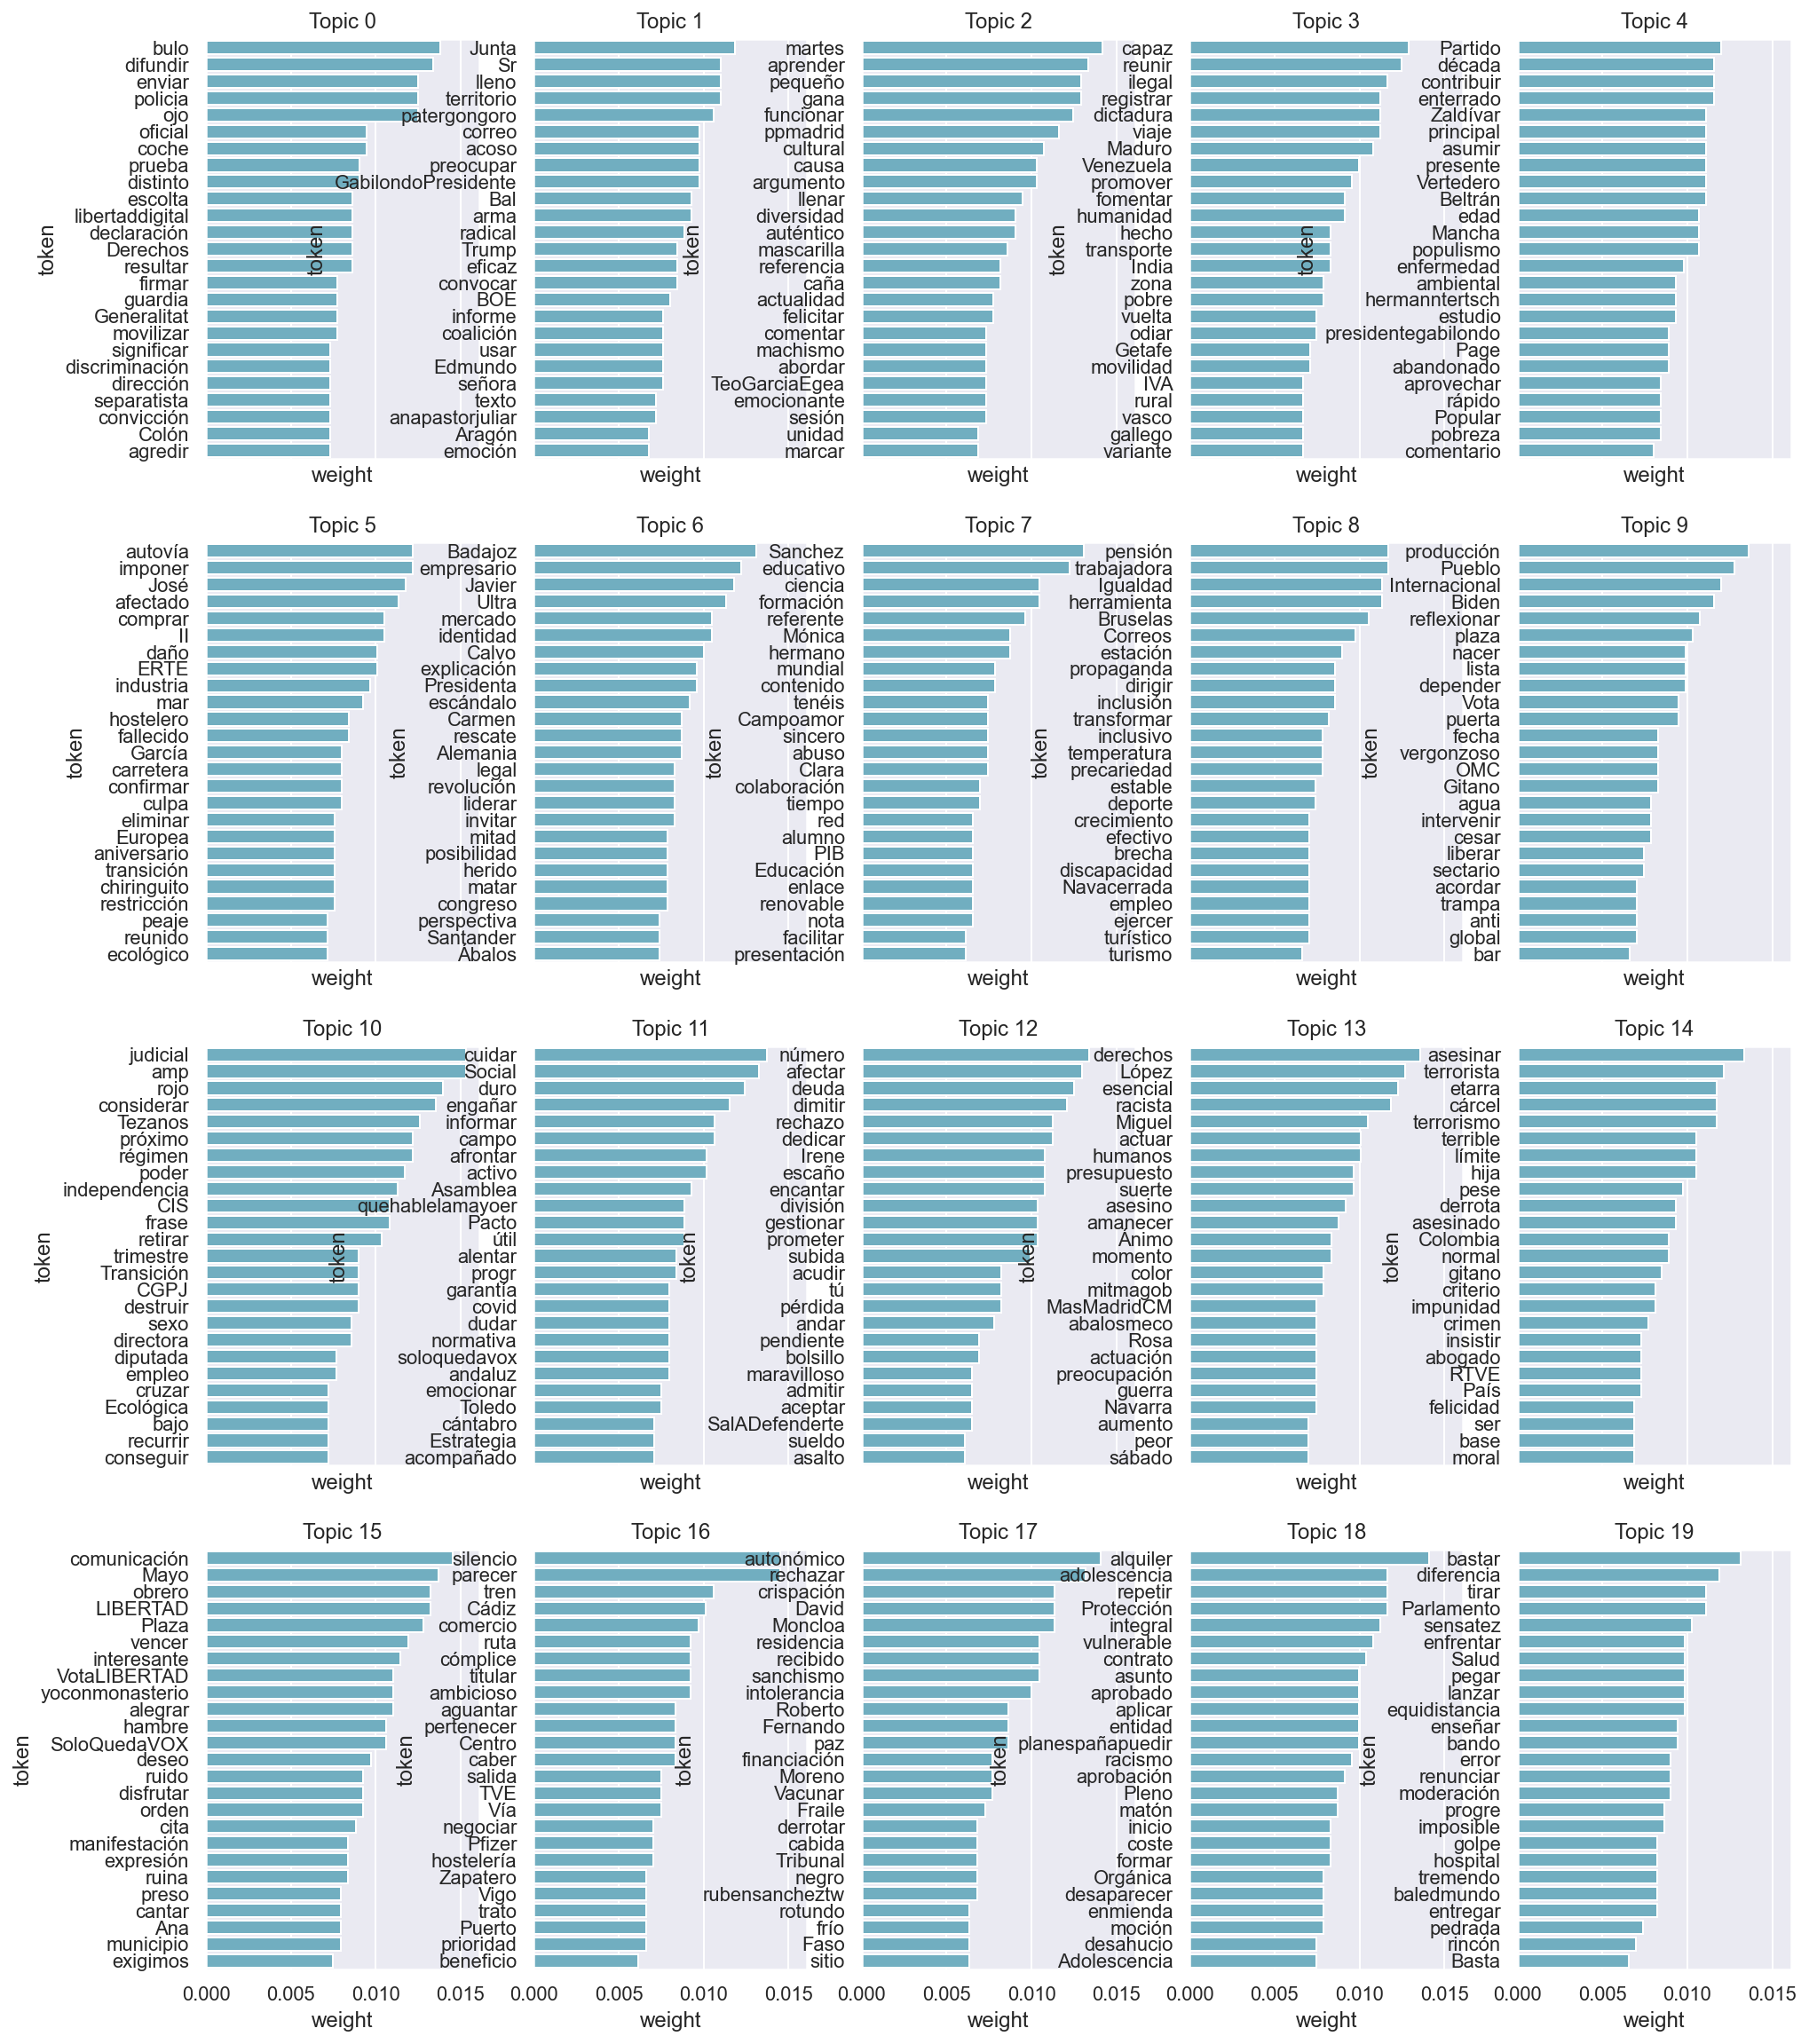

In [17]:
topn = 25

fig, axes = plt.subplots(4, 5, figsize=(16, 20), sharex=True)


for i in range(4):
    for j in range(5):
        df = pd.DataFrame(ldamallet.show_topic(j + 5*(i%5), topn=topn), columns=['token','weight'])
        sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i][j])
        axes[i][j].set_title('Topic ' + str(j + 5*(i%5)))

    
plt.show()

In [18]:
# print(list(ldamallet.load_document_topics()))
# print(len(list(ldamallet.load_document_topics())))


rec = []
for topic in ldamallet.load_document_topics():
    rec.append([value[1] for value in topic])
       
df = pd.DataFrame(rec)

print(len(df), len(data))


df['Likes'] = data.sort_index()["Likes"].to_list()
df['Retweets'] = data.sort_index()["Retweets"].to_list()
df["Party"] = data.sort_index()["Party"].to_list()
df

10753 10753


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Likes,Retweets,Party
0,0.472222,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,770,326,PSOE
1,0.022727,0.022727,0.568182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,653,222,PSOE
2,0.027778,0.027778,0.027778,0.027778,0.472222,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,167,77,PSOE
3,0.022727,0.022727,0.113636,0.022727,0.022727,0.022727,0.113636,0.295455,0.022727,0.113636,...,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,421,211,PSOE
4,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,352,136,PSOE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.035714,0.035714,0.035714,0.178571,0.035714,0.178571,0.035714,0.035714,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,11,3,PP
10749,0.031250,0.031250,0.031250,0.031250,0.031250,0.156250,0.156250,0.031250,0.031250,0.156250,...,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,7,6,PP
10750,0.014706,0.014706,0.073529,0.014706,0.014706,0.485294,0.073529,0.014706,0.014706,0.132353,...,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,0.014706,4,4,PP
10751,0.031250,0.031250,0.156250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,...,0.031250,0.156250,0.031250,0.031250,0.156250,0.031250,0.031250,10,4,PP
